### Task 1

In [1]:
import pandas as pd
import numpy as np
# Load the dataset
data = pd.read_csv('housing.csv')

# Display basic info about the dataset
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

### Task 2

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:\n", missing_values)

Missing values before handling:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [3]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
# Handle missing values using mean imputation
data.loc[:, numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values for categorical fields with mode
data['ocean_proximity'].fillna(data['ocean_proximity'].mode()[0])

# Verify if missing values are handled
print("Missing values after handling:\n", data.isnull().sum())

Missing values after handling:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### Task 3

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Min-Max Scaling
scaler = MinMaxScaler()
data_minmax_scaled = data.copy()
data_minmax_scaled[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Standard Scaling
standard_scaler = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[numeric_cols] = standard_scaler.fit_transform(data[numeric_cols])

print("Data after Min-Max Scaling:\n", data_minmax_scaled.head())
print("Data after Standard Scaling:\n", data_standard_scaled.head())

Data after Min-Max Scaling:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value ocean_proximity  
0    0.008941    0.020556       0.539668            0.902266        NEAR BAY  
1    0.067210    0.186976       0.538027            0.708247        NEAR BAY  
2    0.013818    0.028943       0.466028            0.695051        NEAR BAY  
3    0.015555    0.035849       0.354699            0.672783        NEAR BAY  
4    0.015752    0.042427       0.230776            0.674638        NEAR BAY  
Data after Standard Scaling:
    longitude  la

In [5]:
data = data_minmax_scaled

### Task 4

In [6]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Label Encoding
from sklearn.preprocessing import LabelEncoder

data_label_encoded = data.copy()
for col in categorical_cols:
    le = LabelEncoder()
    data_label_encoded[col] = le.fit_transform(data[col])

# One-Hot Encoding
data_one_hot_encoded = pd.get_dummies(data, columns=categorical_cols)

print("Data after Label Encoding:\n", data_label_encoded.head())
print("Data after One-Hot Encoding:\n", data_one_hot_encoded.head())
data = data_label_encoded

Data after Label Encoding:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.022331        0.019863   
1   0.212151  0.565356            0.392157     0.180503        0.171477   
2   0.210159  0.564293            1.000000     0.037260        0.029330   
3   0.209163  0.564293            1.000000     0.032352        0.036313   
4   0.209163  0.564293            1.000000     0.041330        0.043296   

   population  households  median_income  median_house_value  ocean_proximity  
0    0.008941    0.020556       0.539668            0.902266                3  
1    0.067210    0.186976       0.538027            0.708247                3  
2    0.013818    0.028943       0.466028            0.695051                3  
3    0.015555    0.035849       0.354699            0.672783                3  
4    0.015752    0.042427       0.230776            0.674638                3  
Data after One-Hot Encoding:
    longitud

### Task 5

In [7]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define target and predictors
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Features selected
selected_features = X_train.columns[lasso.coef_ != 0]
print("Features selected by LASSO:\n", selected_features)

# Evaluate the model
y_pred = lasso.predict(X_test)
print("LASSO Regression Performance:")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))


Features selected by LASSO:
 Index([], dtype='object')
LASSO Regression Performance:
R²: -0.00021908714592466794
RMSE: 0.2360518831489312
MAE: 0.18681748714453036


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Task 6

In [1]:
# Compute correlation matrix
correlation_matrix = data.corr().abs()

# Find highly correlated features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

# Drop highly correlated features
data_uncorrelated = data.drop(high_corr_features, axis=1)

# Train and evaluate a regression model
X = data_uncorrelated.drop('median_house_value', axis=1)
y = data_uncorrelated['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Evaluate the model
y_pred = lasso.predict(X_test)
print("Model Performance after Correlation-Based Feature Selection:")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))


NameError: name 'data' is not defined

### Task 7

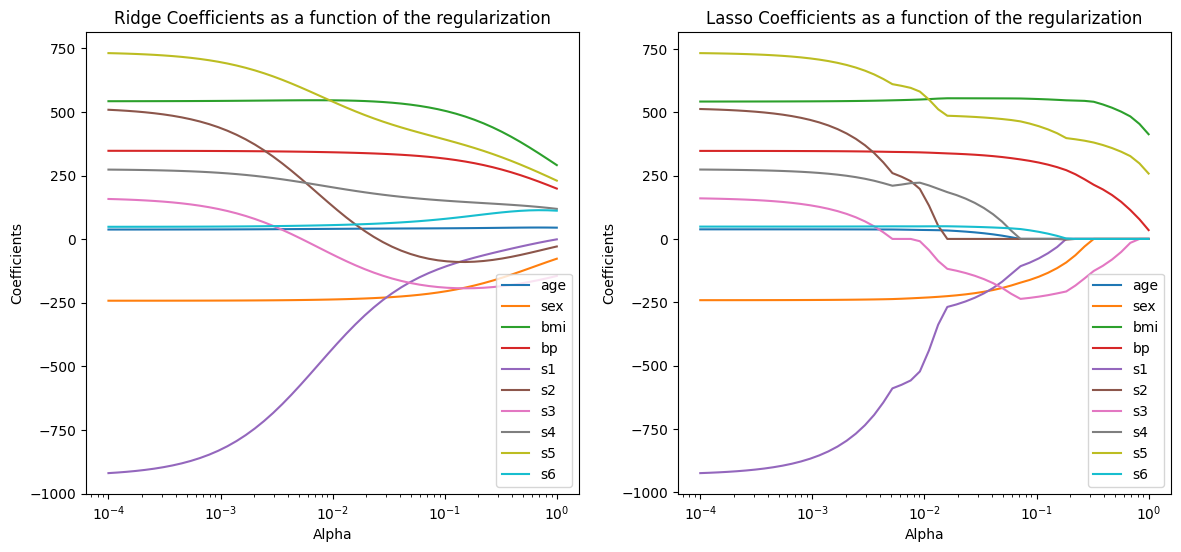

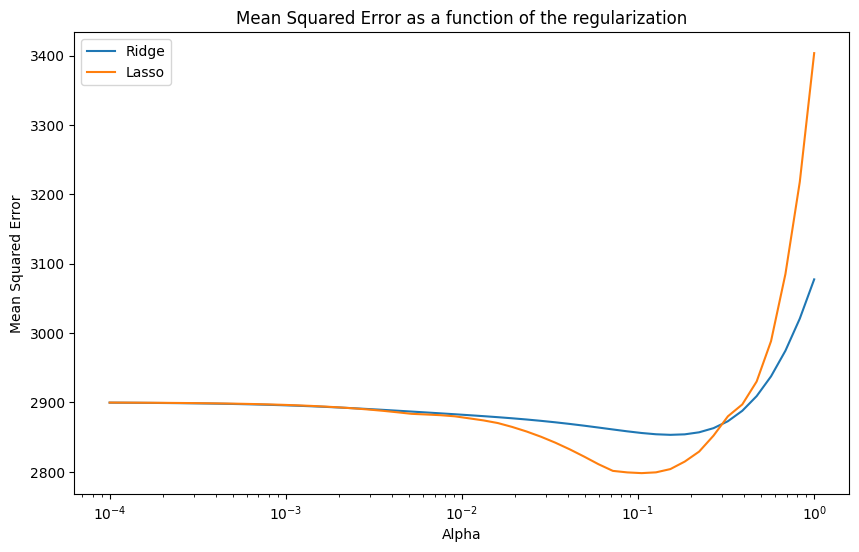

In [11]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values
alphas = np.logspace(-4, 0, 50)

# Initialize lists to store results
ridge_coefs = []
lasso_coefs = []
ridge_errors = []
lasso_errors = []

# Train Ridge and Lasso models for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)
    
    ridge_pred = ridge.predict(X_test)
    lasso_pred = lasso.predict(X_test)
    
    ridge_errors.append(mean_squared_error(y_test, ridge_pred))
    lasso_errors.append(mean_squared_error(y_test, lasso_pred))

# Plot the coefficients as a function of the regularization parameter
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a function of the regularization')
plt.legend(diabetes.feature_names, loc='best')

plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a function of the regularization')
plt.legend(diabetes.feature_names, loc='best')

plt.show()

# Plot the mean squared error as a function of the regularization parameter
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_errors, label='Ridge')
plt.plot(alphas, lasso_errors, label='Lasso')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error as a function of the regularization')
plt.legend(loc='best')
plt.show()

### Task 8

In [13]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the number of folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define custom scoring functions
mse_scorer = make_scorer(mean_squared_error)
r2_scorer = make_scorer(r2_score)
mae_scorer = make_scorer(mean_absolute_error)

# Perform cross-validation
mse_scores = cross_val_score(lasso, X, y, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(lasso, X, y, cv=kf, scoring=r2_scorer)
mae_scores = cross_val_score(lasso, X, y, cv=kf, scoring=mae_scorer)
rmse_scores = np.sqrt(mse_scores)

# Report metrics for each fold
print("Cross-Validation Metrics:")
print("MSE for each fold:", mse_scores)
print("R² for each fold:", r2_scores)
print("MAE for each fold:", mae_scores)
print("RMSE for each fold:", rmse_scores)

# Compare performance with and without cross-validation
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print("\nPerformance without Cross-Validation:")
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Train MAE:", mean_absolute_error(y_train, y_pred_train))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

Cross-Validation Metrics:
MSE for each fold: [3403.57572161 4091.01753878 3869.79768168 4061.82507058 4048.89044476]
R² for each fold: [0.35759188 0.34424209 0.28902288 0.39649174 0.27537681]
MAE for each fold: [49.73032754 53.81539502 51.52863472 55.78953202 54.40102956]
RMSE for each fold: [58.34017245 63.96106268 62.20769793 63.73244912 63.63089222]

Performance without Cross-Validation:
Train MSE: 3860.7549830123576
Test MSE: 3403.5757216070733
Train R²: 0.3646309911295581
Test R²: 0.3575918767219115
Train MAE: 52.95878032849505
Test MAE: 49.73032753662261
Train RMSE: 62.134973911737966
Test RMSE: 58.340172450954185


### Task 9

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

# Train the models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

metrics_linear = evaluate_model(y_test, y_pred_linear)
metrics_ridge = evaluate_model(y_test, y_pred_ridge)
metrics_lasso = evaluate_model(y_test, y_pred_lasso)

# Print the evaluation metrics
print("Linear Regression Performance:")
print(f"MSE: {metrics_linear[0]}, MAE: {metrics_linear[1]}, RMSE: {metrics_linear[2]}, R²: {metrics_linear[3]}")

print("\nRidge Regression Performance:")
print(f"MSE: {metrics_ridge[0]}, MAE: {metrics_ridge[1]}, RMSE: {metrics_ridge[2]}, R²: {metrics_ridge[3]}")

print("\nLasso Regression Performance:")
print(f"MSE: {metrics_lasso[0]}, MAE: {metrics_lasso[1]}, RMSE: {metrics_lasso[2]}, R²: {metrics_lasso[3]}")

Linear Regression Performance:
MSE: 2900.19362849348, MAE: 42.79409467959994, RMSE: 53.853445836765914, R²: 0.4526027629719197

Ridge Regression Performance:
MSE: 3077.41593882723, MAE: 46.13885766697452, RMSE: 55.47446204180109, R²: 0.41915292635986545

Lasso Regression Performance:
MSE: 2798.193485169719, MAE: 42.85442771664998, RMSE: 52.897953506442185, R²: 0.4718547867276227


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Model Performance Comparison

### Linear Regression Performance:
- **Mean Squared Error (MSE):** 2900.19362849348
- **Mean Absolute Error (MAE):** 42.79409467959994
- **Root Mean Squared Error (RMSE):** 53.853445836765914
- **R² Score:** 0.4526027629719197

### Ridge Regression Performance:
- **Mean Squared Error (MSE):** 3077.41593882723
- **Mean Absolute Error (MAE):** 46.13885766697452
- **Root Mean Squared Error (RMSE):** 55.47446204180109
- **R² Score:** 0.41915292635986545

### Lasso Regression Performance:
- **Mean Squared Error (MSE):** 2798.193485169719
- **Mean Absolute Error (MAE):** 42.85442771664998
- **Root Mean Squared Error (RMSE):** 52.897953506442185
- **R² Score:** 0.4718547867276227

### Discussion of Scenarios:

- **Linear Regression:** 
    - Performs better when the relationship between the independent and dependent variables is approximately linear and there is no multicollinearity in the data.
    - Suitable for datasets with a large number of features where feature selection is not critical.

- **Ridge Regression:**
    - Performs better in scenarios where multicollinearity is present among the features.
    - Useful when you want to retain all features but reduce their impact by shrinking the coefficients.
    - Suitable for datasets where overfitting is a concern and you want to regularize the model.

- **Lasso Regression:**
    - Performs better when feature selection is important, as it can shrink some coefficients to zero, effectively performing variable selection.
    - Suitable for datasets with many features, especially when some of them are not important.
    - Useful when you want a simpler model that is easier to interpret.

Each model has its strengths and is suitable for different scenarios based on the nature of the data and the specific requirements of the analysis.